# Analyze data from the Azores site of EMSO  

An EGIM prototype was deployed at Lucky Strike hydrothermal vent site, 25 m south west of the active edifice Tour Eiffel, to monitor local hydrodynamic variability and complement the data obtained by the numerous sensors set on this site: oceanographic mooring deployed south of the vent field, the multidisciplinary Seamon East node, autonomous current meters, array of temperature probes.

<img src="https://www.seanoe.org/data/00454/56522/illustrations/illustration-41.gif" alt="Map of EGIM in Azores" style="width: 50%;"/>

The owners of the EGIM have not ingested the data to the Data Manager Portal (DMP) of EMSO, but they published the RAW data in CSV on other websites. For this example, we are going to use the RAW data.

In [1]:
# Source of data
OXYMETER = "https://www.seanoe.org/data/00453/56501/data/58190.csv"
TSUNAMI_METER = "http://www.seanoe.org/data/00454/56522/data/58210.csv"
COSTOF2 = "https://www.seanoe.org/data/00455/56627/data/58360.csv"
CTD = "https://www.seanoe.org/data/00454/56528/data/58220.csv"
TURBIDITY_METER = "https://www.seanoe.org/data/00454/56525/data/58214.csv"
ADCP = "https://www.seanoe.org/data/00455/56665/data/58415.csv"

## Imports

Customarily, we import as follows:

In [2]:
from mooda import WaterFrame
from mooda.access import EGIM
import matplotlib.pyplot as plt

## Object creation

A WaterFrame is an object that contains a Panas DataFrame that contains the time series, a dictionary with the metadata and a dictionary with the meaning of the parameters (keys) of the time series.

The class EGIM contains methods to open and download data from the DMP and RAW data from the EMSO sites. It returns a WaterFrame object.

In [3]:
# You can change the source of data. We are going to use the CTD data
source = CTD

# wf is a WaterFrame object
# The function has to download the raw data from the webpage, so it takes a while.
# mooda v0.2.0-alpha can only open raw data from EMSO-Azores 
wf = EGIM.from_raw_csv(observatory="EMSO-Azores", path=source)

In [4]:
wf

Memory usage: 2.24 MBytes
Parameters:
  - TEMP:  Temperature of the water column (degree_Celsius)
    - Min value: 4.381
    - Date min value: 2018-03-04 03:15:00
    - Max value: 36.687
    - Date max value: 2017-07-16 17:30:00
    - Mean value: 4.730
    - Values with QC = 1: 0.000 %
  - CNDC: Electrical conductivity of the water column (S/m)
    - Min value: 0.003
    - Date min value: 2017-07-17 07:15:00
    - Max value: 5.354
    - Date max value: 2017-07-17 14:45:00
    - Mean value: 3.359
    - Values with QC = 1: 0.000 %
  - MPMN: Moored instrument depth (meters)
    - Min value: -1.517
    - Date min value: 2017-07-17 11:00:00
    - Max value: 1723.860
    - Date max value: 2018-02-02 03:15:00
    - Mean value: 1711.334
    - Values with QC = 1: 0.000 %
  - PSAL: Salinity of the water column (PSU)
    - Min value: 0.020
    - Date min value: 2017-07-17 07:00:00
    - Max value: 36.342
    - Date max value: 2017-07-17 14:45:00
    - Mean value: 34.746
    - Values with QC = 1: 

## View data, metadata and meenings

Print metadata information.

In [5]:
info_metadata = wf.info_metadata()
print("Metadata:\n{}".format(info_metadata))

Metadata:
  - site_code: Azores
  - platform_code: EMSO-Azores
  - data_mode: D
  - title: Data from EGIM in the EMSO Site Azores
  - summary: This dataset contains pressure data acquired between July 2017 and August 2018 on EMSO-Azores observatory by the EGIM. The pressure is one of the 7 core parameters monitored by the EGIM, EMSO Generic Instrumental Module. The EGIM prototype was deployed at Lucky Strike hydrothermal vent site, 25 m south west of the active edifice Tour Eiffel, to monitor local hydrodynamic variability and complement the data obtained by the numerous sensors set on this site: oceanographic mooring deployed south of the vent field, the multidisciplinary Seamon East node, autonomous current meters, array of temperature probes.
  - source: subsurface mooring
  - institution: Ifremer, CNRS, IPGP
  - project: EMSODEV
  - keywords_vocabulary: GCMD Science Keywords
  - comment: Test data
  - geospatial_lat_min: 37.289433
  - geospatial_lat_max: 37.289433
  - geospatial_la

The method that loads the RAW data renames the measurement parameters following the OceanSites recommendation. For example, TEMPERATURE is TEMP, and SALINITY is PSAL.

Print the information of the meanings to know the meaning of the data parameters.

In [6]:
info_meaning = wf.info_meaning()
print("Meanings:\n{}".format(info_meaning))

Meanings:
  - TEMP
    - long_name:  Temperature of the water column
    - units: degree_Celsius
  - CNDC
    - long_name: Electrical conductivity of the water column
    - units: S/m
  - MPMN
    - long_name: Moored instrument depth
    - units: meters
  - PSAL
    - long_name: Salinity of the water column
    - units: PSU
  - SVEL
    - long_name: Sound velocity of the water column
    - units: meters/second


The time series are stored into a Pandas DataFrame so that you can play with it with all the Pandas functionalities.

In [7]:
df = wf.data

In [8]:
df.head()

,TEMP,CNDC,MPMN,PSAL,SVEL,TEMP_QC,CNDC_QC,MPMN_QC,PSAL_QC,SVEL_QC
TIME,,,,,,,,,,
2017-07-12 16:45:00,29.2853,0.01731,-0.346,0.0792,1507.558,0,0,0,0,0
2017-07-12 17:00:00,29.2997,0.01723,-0.584,0.0789,1507.588,0,0,0,0,0
2017-07-12 17:15:00,29.0609,0.01709,-0.562,0.0786,1507.023,0,0,0,0,0
2017-07-12 17:30:00,29.1935,0.01715,-0.699,0.0787,1507.335,0,0,0,0,0
2017-07-12 17:45:00,29.0288,0.01711,-0.678,0.0787,1506.945,0,0,0,0,0


## QC generation 

As you can see in the previous output, the data frame contains some column names with a "_ QC." Those columns contain the QC flag values of the associated measurement parameter. All numbers of the QC columns are 0, that means that the measurements have not passed any QC test.

There is a function that performs all the QC tests automatically, but in this case we will call the functions manually to understand what we are doing.

In this example, we are going to use the following flag convention:

* Flag = 1 -> Good data.
* Flag = 2 -> Data did not pass the Flat test (it contains equal consecutive values).
* Flag = 3 -> Data did not pass the Spike test (it is a spike or part of a big spike).
* Flag = 4 -> Data did not pass the Range test (it is not into a reasonable range of the parameter).

In [9]:
print("Data before the QC tests:")
df.head()

Data before the QC tests:


,TEMP,CNDC,MPMN,PSAL,SVEL,TEMP_QC,CNDC_QC,MPMN_QC,PSAL_QC,SVEL_QC
TIME,,,,,,,,,,
2017-07-12 16:45:00,29.2853,0.01731,-0.346,0.0792,1507.558,0,0,0,0,0
2017-07-12 17:00:00,29.2997,0.01723,-0.584,0.0789,1507.588,0,0,0,0,0
2017-07-12 17:15:00,29.0609,0.01709,-0.562,0.0786,1507.023,0,0,0,0,0
2017-07-12 17:30:00,29.1935,0.01715,-0.699,0.0787,1507.335,0,0,0,0,0
2017-07-12 17:45:00,29.0288,0.01711,-0.678,0.0787,1506.945,0,0,0,0,0


In [10]:
# wf.parameters() returns a list of all DataFrame column name without "_QC".
for parameter in wf.parameters():

    # Gross range test: The function checks if each value is in the reasonable range of the parameter.
    wf.reset_flag(key=parameter)
    wf.range_test(key=parameter, flag=4)
    # Spike test: It detects spikes in a timeserie.
    wf.spike_test(key=parameter,flag=3)
    # Flat test: It detects no changes in values of time-series.
    wf.flat_test(key=parameter,flag=2)
    # Change all values that still are 0, to 1.
    wf.flag2flag(key=parameter, original_flag=0, translated_flag=1)
    
    
print("Data after QC tests:")
df.head()

Data after QC tests:


,TEMP,CNDC,MPMN,PSAL,SVEL,TEMP_QC,CNDC_QC,MPMN_QC,PSAL_QC,SVEL_QC
TIME,,,,,,,,,,
2017-07-12 16:45:00,29.2853,0.01731,-0.346,0.0792,1507.558,1,1,1,1,3
2017-07-12 17:00:00,29.2997,0.01723,-0.584,0.0789,1507.588,1,1,1,1,3
2017-07-12 17:15:00,29.0609,0.01709,-0.562,0.0786,1507.023,1,1,1,1,3
2017-07-12 17:30:00,29.1935,0.01715,-0.699,0.0787,1507.335,1,1,1,1,3
2017-07-12 17:45:00,29.0288,0.01711,-0.678,0.0787,1506.945,1,1,1,2,3


## Other methods of the WaterFrame object

In this section, I propose an example of analysis in which some of the methods of a WaterFrame are used. The example is not very useful in real life, but lets show how the methods are used.

Imagine that we are only interested in data with QC Flag = 1 (good data), during January and February, averaged over time and we also want to change the name of the TEMP parameter to TEMPERATURE. The code to do it would be the following.

In [11]:
# Only use data with QC flag = 1. The other data will be deleted. 
wf.use_only(flags=1)
# Change name of the parameter "TEMP" to "TEMPERATURE"
wf.rename(old_name="TEMP", new_name="TEMPERATURE")
# Only use data from Jenuary and February
# Dates are with the format AAAAMMDDhhmmss
wf.slice_time(start="20180101000000", end="20180301000000")
wf

Memory usage: 429.54 KBytes
Parameters:
  - TEMPERATURE:  Temperature of the water column (degree_Celsius)
    - Min value: 4.384
    - Date min value: 2018-01-15 04:45:00
    - Max value: 4.788
    - Date max value: 2018-01-29 01:15:00
    - Mean value: 4.571
    - Values with QC = 1: 100.000 %
  - CNDC: Electrical conductivity of the water column (S/m)
    - Min value: 3.356
    - Date min value: 2018-01-06 19:00:00
    - Max value: 3.401
    - Date max value: 2018-01-29 01:15:00
    - Mean value: 3.380
    - Values with QC = 1: 100.000 %
  - MPMN: Moored instrument depth (meters)
    - Min value: 1722.502
    - Date min value: 2018-02-28 07:00:00
    - Max value: 1723.860
    - Date max value: 2018-02-02 03:15:00
    - Mean value: 1723.146
    - Values with QC = 1: 100.000 %
  - PSAL: Salinity of the water column (PSU)
    - Min value: 34.710
    - Date min value: 2018-01-06 19:00:00
    - Max value: 34.998
    - Date max value: 2018-01-27 04:00:00
    - Mean value: 34.977
    - Val

Before, the memory usage of our object was 2.24 MBytes. Now it is only 429.54 KBytes. If we wanted to continue analyzing it or sharing the data, with the new size, it would be much more convenient and faster.

## Plotting 

As I mentioned earlier, the data of the WaterFrame is placed into a Pandas DataFrame and you can use all the DataFrame plotting methods. However, there are a few more methods that could help you to have a first view of the data. Here you have the plotting techniques of a WaterFrame.

In [12]:
# Magic function of Jupyter
%matplotlib inline

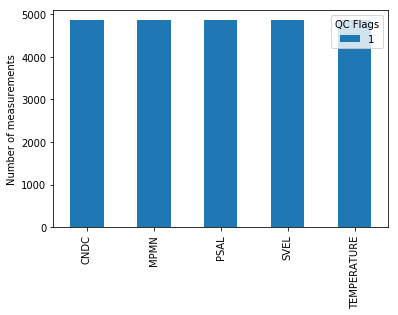

In [20]:
# Ploting a bar graph with the count of the number of values with each QC flag value.
# Now we have all values with QC Flag = 1.
wf.qcbarplot()

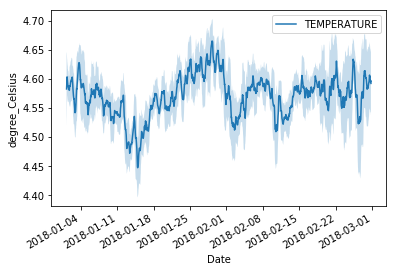

In [13]:
# Plot the time series of the TEMPERATURE parameter
wf.tsplot("TEMPERATURE")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275FDC735F8>]], dtype=object)

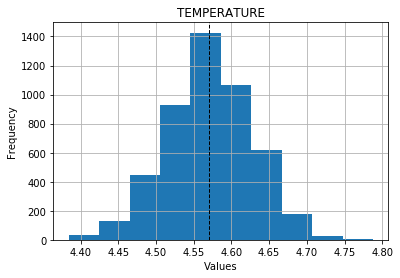

In [16]:
# Plottig a histogram of the TEMPERATURE
# The dashed line indicates the mean
# 10 bins are used in the histogram.
wf.hist("TEMPERATURE", mean_line=True, bins=10)

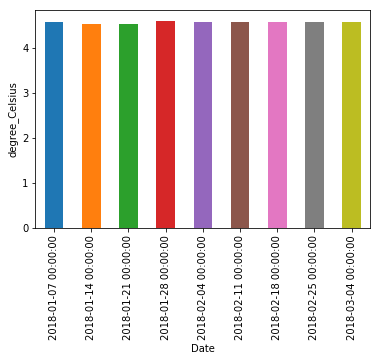

In [17]:
# Plotting a bar graph of the averaged values weekly.
wf.barplot("TEMPERATURE", average_time='W')

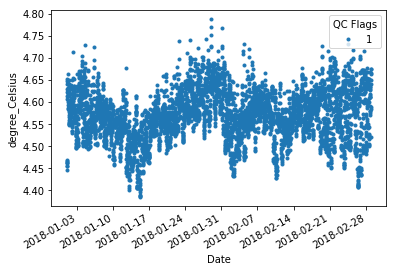

In [18]:
# Ploting the time-series but related with the QC flags.
# Now we have all values with QC Flag = 1.
wf.qcplot("TEMPERATURE")

## Save the WaterFrame after processed 

If you want to save your data again into a new file, you can do it into CSV or pikel.

In [21]:
# Save into a pickle file
wf.to_pickle(path="mydata.pkl")

In [23]:
# Save into a CSV file following the EmodNet way
wf.to_csv(path="mydata.csv")

True